### Predicing Something

In our last exercises, we learned about Python, Matrices, Vectors, handing and plotting data. In this tutorial, we will use all that information and create a mathematical model to predict housing prices using Linear regression. 


#### What is Linear Regression

### Predicting Housing prices using Linear Regression

We will take the Housing dataset which contains information about different houses in Boston. We can access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

So let’s get started.

In [33]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [34]:
print(boston_dataset.keys()) 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [35]:
print (boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [36]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
boston['MEDV'] = boston_dataset.target

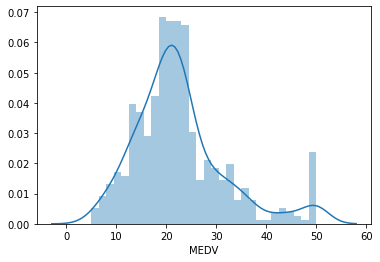

In [38]:
sns.distplot(boston['MEDV'], bins=30)
plt.show()

In [39]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [42]:
Y_predict = lin_model.predict(X_test)
print (X_test.shape)
print (Y_predict)

(102, 2)
[37.38999403 29.79290611 25.86755297  0.31370828 33.31385559  7.97136102
 30.7066387  27.83076842 26.26693081 21.97871678 32.33149332 23.21791374
 22.9932889  30.97465356 27.19747687 20.7171544  -0.67524986 18.01248654
 12.3108109  21.90615827  4.82262227 24.00423026 37.70279396 24.59521859
 29.6355729  12.5396288  27.07081337 22.44485896 27.64895322 28.99223597
 11.38689571 10.39119661 18.02726641 24.65916571 26.3259374  22.97547671
 26.32610451 12.30204538 37.03909693 33.55198947 20.2779501   1.0905118
 27.65786778 16.52789139 27.49181818 29.91634422 -3.04746229 17.23365847
 20.71953914 13.74285813 20.74965837 21.48012369 25.17310326 16.12470269
 17.61200383 27.89189158 36.0647476  19.67862758 28.88714637 20.4560256
 20.11858445 23.1131674  16.53445226 31.30827991 22.62162748 13.10525045
 23.36377939 25.90474345 23.00735629 21.62430016 19.09598641 26.54344302
 16.82687517 19.99592881 19.77353574 30.38611207 19.34927447 13.03847313
 28.29385627 19.03960282 22.09279603 38.7911

Scatter plots of Actual vs Predicted are one of the richest form of data visualization. You can tell pretty much everything from it. Ideally, all your points should be close to a regressed diagonal line. So, if the Actual is 5, your predicted should be reasonably close to 5 to. If the Actual is 30, your predicted should also be reasonably close to 30. So, just draw such a diagonal line within your graph and check out where the points lie. If your model had a high R Square, all the points would be close to this diagonal line. The lower the R Square, the weaker the Goodness of fit of your model, the more foggy or dispersed your points are (away from this diagonal line).

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

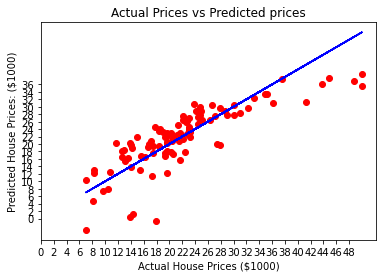

In [48]:
plt.scatter(Y_test, Y_predict , c = 'red')

# 100 percent accuracy line

plt.plot(Y_test, Y_test, c = 'blue')
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(Y_test)),2))
plt.yticks(range(0, int(max(Y_predict)),2))
plt.title("Actual Prices vs Predicted prices")